<a href="https://colab.research.google.com/github/mjcrgn/data_credential/blob/master/210115_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 Data Analysis

Description: Ingest data from the latest New York Times' county-level COVID-19 database
at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a
chosen state, calculate the daily count of new cases and new deaths, print the most recent 30 days' worth of data for
the selected county. Perform EDA and show your findings through different plots and visualization techniques.

- Task 1: Environment Set up
- Task 2: Data Collection
- Task 3: Data Wrangling and EDA (Exploratory Data Analysis)
- Task 4: Understand NY Covid 19 data in last 30 days
- Task 5: Comparing Covid 19 data with different states
- Task 6: Conclusion

###*Worked with Ariana, Tashi*

#Import libraries and data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import dataframe
# Set date as index column
# Recognize date format as datetime object

df = pd.read_csv(
    'https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv', 
    index_col = 'date', 
    parse_dates = True
)

#General information

In [ ]:
# Retrieve info for whole dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943233 entries, 2020-01-21 to 2021-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   county  943233 non-null  object 
 1   state   943233 non-null  object 
 2   fips    934434 non-null  float64
 3   cases   943233 non-null  int64  
 4   deaths  923068 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 43.2+ MB


In [ ]:
# Display first and last 5 rows

df.head(-1)

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...
2021-01-18,Sublette,Wyoming,56035.0,634,7.0
2021-01-18,Sweetwater,Wyoming,56037.0,3312,26.0
2021-01-18,Teton,Wyoming,56039.0,2753,4.0


#Clean data

####Drop 'fips' column

In [ ]:
# Display updated dataframe

df.drop('fips', axis = 1, inplace = True)
df.head(-1)

,county,state,cases,deaths
date,,,,
2020-01-21,Snohomish,Washington,1,0.0
2020-01-22,Snohomish,Washington,1,0.0
2020-01-23,Snohomish,Washington,1,0.0
2020-01-24,Cook,Illinois,1,0.0
2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...
2021-01-18,Sublette,Wyoming,634,7.0
2021-01-18,Sweetwater,Wyoming,3312,26.0
2021-01-18,Teton,Wyoming,2753,4.0


#Compare New York to Mid-Atlantic Region

####Create new dataframe for Mid-Atlantic

In [ ]:
# Create list for Mid-Atlantic states

states = [
          'New York',
          'New Jersey',
          'Pennsylvania',
          'Delaware',
          'Maryland',
          'Virginia',
          'West Virginia'
]

In [ ]:
# Filter dataframe for only those states
# Create new dataframe for only those states and display

bool_states = (df['state'] == 'New York') | (df['state'] == 'New Jersey') | (df['state'] == 'Pennsylvania') | (df['state'] == 'Delaware') | (df['state'] == 'Maryland') | (df['state'] == 'Virginia') | (df['state'] == 'West Virginia')
df_states = df[bool_states]
df_states.head(-1)

,county,state,cases,deaths
date,,,,
2020-03-01,New York City,New York,1,0.0
2020-03-02,New York City,New York,1,0.0
2020-03-03,New York City,New York,2,0.0
2020-03-04,Bergen,New Jersey,1,0.0
2020-03-04,New York City,New York,2,0.0
...,...,...,...,...
2021-01-18,Wayne,West Virginia,2109,26.0
2021-01-18,Webster,West Virginia,221,0.0
2021-01-18,Wetzel,West Virginia,884,17.0


####Exploratory Data Analysis

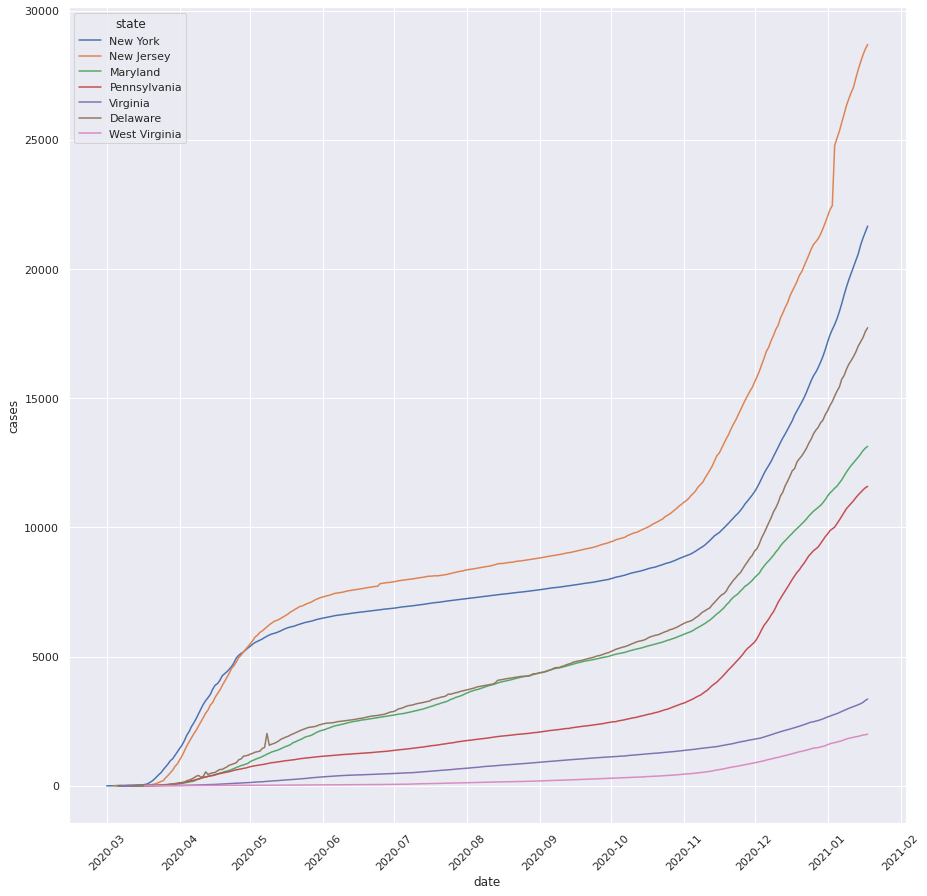

In [ ]:
# Create lineplot to compare total COVID cases across Mid-Atlantic against time
# Since we set date column as index, we can set the x value to the dataframe's index

sns.lineplot(x = df_states.index,
             y = df_states['cases'],
             hue = df_states['state'],
             err_style = None
            )
sns.set(rc = {'figure.figsize': (18, 15)})
plt.xticks(rotation = 45);

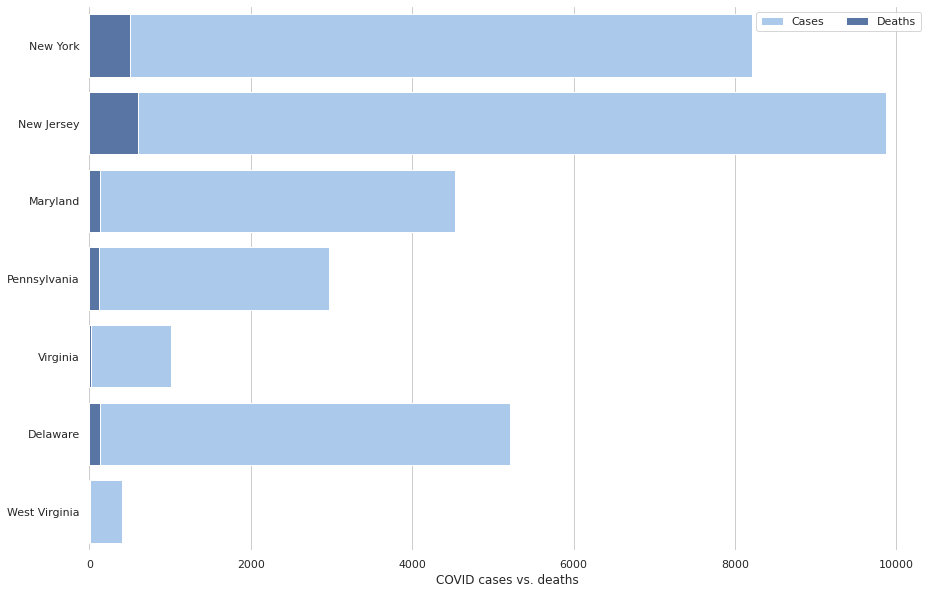

In [ ]:
# Create barplot comparing total cases vs. deaths across Mid-Atlantic
# Followed example from seaborn documentation: https://seaborn.pydata.org/examples/part_whole_bars.html

# Set plot style and size
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize = (15, 10))

# Plot cases
sns.set_color_codes('pastel')
sns.barplot(data = df_states, 
            x = df_states['cases'], 
            y = df_states['state'],
            label = 'Cases',
            color = 'b',
            ci = None) # Remove error bars

# Plot deaths
sns.set_color_codes('deep')
sns.barplot(data = df_states, 
            x = df_states['deaths'], 
            y = df_states['state'],
            label = 'Deaths',
            color = 'b',
            ci = None)

# Add legend
ax.set(xlabel = 'COVID cases vs. deaths', ylabel = '')
ax.legend(ncol = 2, loc = 'best', frameon = True)
sns.despine(left = True, bottom = True)

#Isolate data for New York City

####Retrieve data for last 30 days

In [ ]:
# Filter data for New York City
# Create copy of original dataframe when creating new one to avoid slicing original

bool_NYC = (df['county'] == 'New York City')
df_NYC = df[bool_NYC].copy()

In [ ]:
# Display data for NYC dataframe

df_NYC.info()
df_NYC.head(-1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 2020-03-01 to 2021-01-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  324 non-null    object 
 1   state   324 non-null    object 
 2   cases   324 non-null    int64  
 3   deaths  324 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.7+ KB


,county,state,cases,deaths
date,,,,
2020-03-01,New York City,New York,1,0.0
2020-03-02,New York City,New York,1,0.0
2020-03-03,New York City,New York,2,0.0
2020-03-04,New York City,New York,2,0.0
2020-03-05,New York City,New York,4,0.0
...,...,...,...,...
2021-01-13,New York City,New York,504826,25741.0
2021-01-14,New York City,New York,510711,25834.0
2021-01-15,New York City,New York,517963,25909.0


In [ ]:
# Slice dataframe for last 30 days
# Again, create copy of original to avoid slicing it

df_NYC30days = df_NYC.loc['2020-dec-18':].copy()
df_NYC30days.head()

,county,state,cases,deaths
date,,,,
2020-12-18,New York City,New York,377728,24652.0
2020-12-19,New York City,New York,381067,24677.0
2020-12-20,New York City,New York,383808,24697.0
2020-12-21,New York City,New York,387595,24735.0
2020-12-22,New York City,New York,391634,24768.0


####Add two columns to show difference in new cases/deaths per day

In [ ]:
# Add new columns to show the number of new cases and new deaths per day
# Display new dataframe
# Code from: https://drkblake.com/nytimes-covid-19-county-data-downloader/

df_NYC30days['New cases'] = df_NYC30days['cases'] - df_NYC30days['cases'].shift(1).fillna(0)
df_NYC30days['New deaths'] = df_NYC30days['deaths'] - df_NYC30days['deaths'].shift(1).fillna(0)

df_NYC30days.head()

,county,state,cases,deaths,New cases,New deaths
date,,,,,,
2020-12-18,New York City,New York,377728,24652.0,377728.0,24652.0
2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0


In [ ]:
# The above dataframe totals all unshown, previous cases/deaths in first row
# Slice dataframe to only show second row to end

df_NYC30days = df_NYC30days.copy().loc['2020-12-19':]
df_NYC30days.head()

,county,state,cases,deaths,New cases,New deaths
date,,,,,,
2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0
2020-12-23,New York City,New York,395810,24790.0,4176.0,22.0


####Exploratory Data Analysis

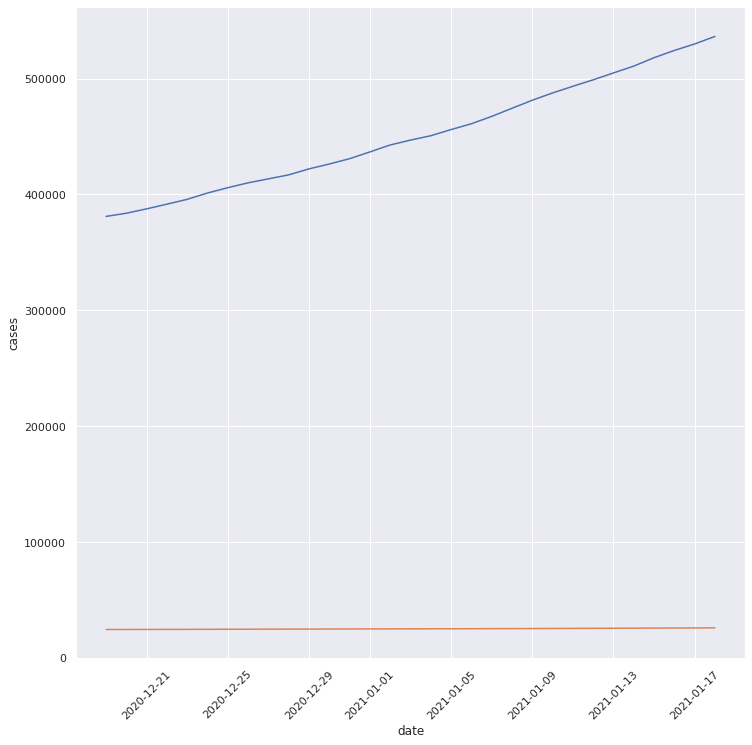

In [ ]:
# Create lineplot to plot rise of cases vs. deaths in NYC in the last 30 days

sns.lineplot(x = df_NYC30days.index, y = df_NYC30days['cases'])
sns.lineplot(x = df_NYC30days.index, y = df_NYC30days['deaths'])
sns.set(rc = {'figure.figsize':(12, 12)})
plt.xticks(rotation = 45);

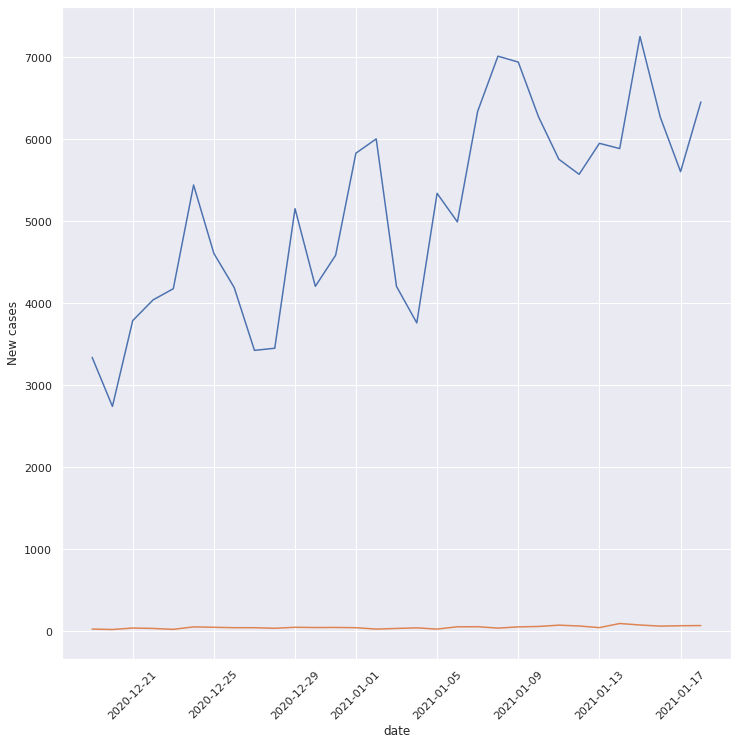

In [ ]:
# Create lineplot to plot change in new cases vs. new deaths in NYC in the last 30 days

sns.lineplot(x = df_NYC30days.index, y = df_NYC30days['New cases'])
sns.lineplot(x = df_NYC30days.index, y = df_NYC30days['New deaths'])
sns.set(rc = {'figure.figsize':(12, 12)})
plt.xticks(rotation = 45);

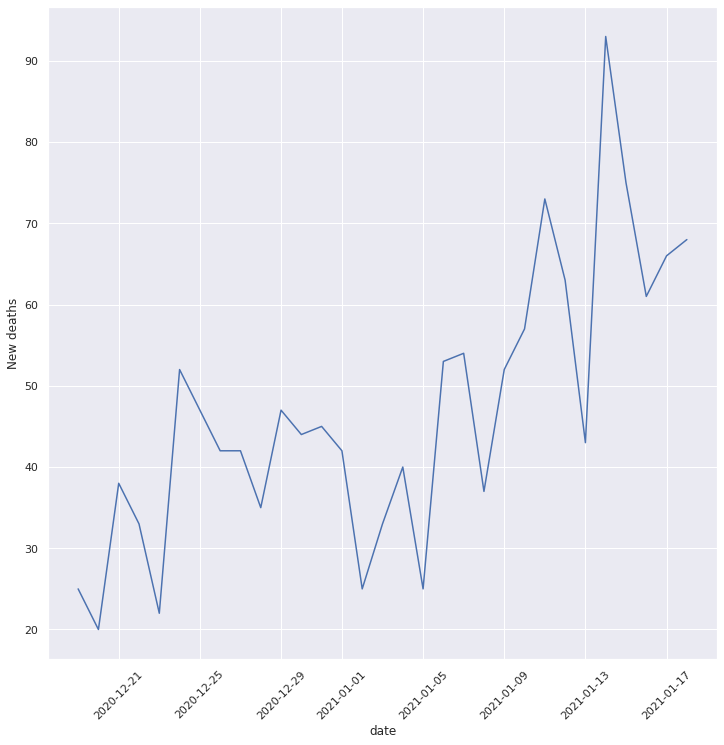

In [ ]:
# Lineplot for new deaths, when plotted against new cases, looks too flat
# Create lineplot to plot change in new deaths alone in NYC in the last 30 days

sns.lineplot(x = df_NYC30days.index, y = df_NYC30days['New deaths'])
sns.set(rc = {'figure.figsize':(12, 12)})
plt.xticks(rotation = 45);

#Conclusion

Compared to other states in the Mid-Atlantic Region, New York saw an earlier, steeper rise in COVID cases. However, as the virus spread throughout the country, this dataset shows that New Jersey has overtaken New York in total cases. 

Since March, COVID cases have increased steadily in all states in this region. New York and New Jersey in particular saw steep increases in their case numbers in the spring, before plateauing again in the summer and early fall. Sometime in November, however, five Mid-Atlantic states saw their curves take dramatic upticks with no signs of stopping. 

Isolating data in the last 30 days for New York City shows similar trends. Even charting only the difference in the number of new cases and deaths from day to day, instead of simply looking at the total number of cases and deaths, displays a similar upward trend. 

If the general trend for both New York City and across the Mid-Atlantic is to be believed, the rate of new cases as well as new deaths across the entire country is getting steeper by the day. We have, as a whole, been far too lax in our preventative measures against COVID. In tandem with efficient distribution of the new COVID vaccine, we must continue to maintain social distancing guidelines and perhaps consider more stringent measures in order to flatten the curve and prevent even more suffering nationwide.  